In [ ]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import names

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# .map('{:,.2f}'.format) - - - for big numbers

: 

In [ ]:
caffeine_df = pd.read_csv('/Users/jakemeissner/Documents/datasets/caffeine.csv')
caffeine_df.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


: 

In [ ]:
caffeine_df[caffeine_df['drink'].str.match("Red Bull")]

,drink,Volume (ml),Calories,Caffeine (mg),type
188,Red Bull,250.19181,117,80,Energy Drinks
189,Red Bull Editions,250.19181,113,80,Energy Drinks
190,Red Bull Sugarfree,250.19181,10,80,Energy Drinks
191,Red Bull Zero,250.19181,0,80,Energy Drinks
428,Red Bull Simply Cola,250.19181,0,32,Soft Drinks


: 

In [ ]:
caffeine_df[caffeine_df['drink'].str.match('Maxwell')]

,drink,Volume (ml),Calories,Caffeine (mg),type
140,Maxwell House Coffee,236.588,0,112,Coffee
141,Maxwell House Max Boost Coffee,236.588,0,196,Coffee


: 

In [ ]:
caffeine_df.iloc[140]

drink            Maxwell House Coffee
Volume (ml)                   236.588
Calories                            0
Caffeine (mg)                     112
type                           Coffee
Name: 140, dtype: object

: 

In [ ]:
caffeine_df.iloc[188]

drink                 Red Bull
Volume (ml)          250.19181
Calories                   117
Caffeine (mg)               80
type             Energy Drinks
Name: 188, dtype: object

: 

Text(0, 0.5, 'Caffeine (in mg)')

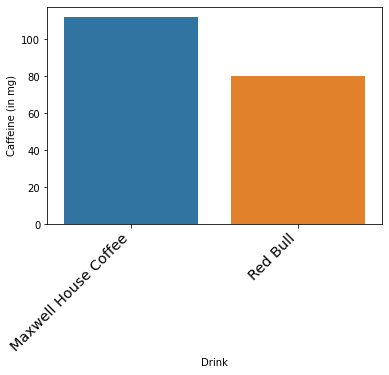

: 

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x = [caffeine_df.iloc[140]['drink'], caffeine_df.iloc[188]['drink']], 
y = [caffeine_df.iloc[140]['Caffeine (mg)'], caffeine_df.iloc[188]['Caffeine (mg)']])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Drink')
plt.ylabel('Caffeine (in mg)')

Text(0, 0.5, 'Caffeine (in mg)')

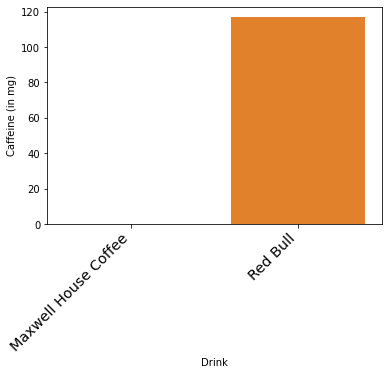

: 

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x = [caffeine_df.iloc[140]['drink'], caffeine_df.iloc[188]['drink']], 
y = [caffeine_df.iloc[140]['Calories'], caffeine_df.iloc[188]['Calories']])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Drink')
plt.ylabel('Caffeine (in mg)')

In [ ]:
caffeine_df[caffeine_df['drink'].str.match('Starbucks')]

,drink,Volume (ml),Calories,Caffeine (mg),type
8,Starbucks Doubleshot Espresso,192.22775,140,120,Coffee
16,Starbucks Bottled Frappuccino,405.15695,300,110,Coffee
29,Starbucks Bottled Iced Coffee,1419.52800,240,640,Coffee
57,Starbucks Caramel Macchiato,473.17600,250,150,Coffee
58,Starbucks Cold Brew Coffee,473.17600,5,205,Coffee
59,Starbucks Decaf Coffee,473.17600,0,25,Coffee
60,Starbucks Grande Caffe Americano,473.17600,15,225,Coffee
61,Starbucks Grande Caffe Latte,473.17600,190,150,Coffee
62,Starbucks Grande Caffe Mocha,473.17600,370,175,Coffee
63,Starbucks Grande Cappuccino,473.17600,140,150,Coffee


: 

In [ ]:
caffeine_df[caffeine_df['drink'].str.match('Starbucks')].sort_values('Caffeine (mg)', ascending=False)

,drink,Volume (ml),Calories,Caffeine (mg),type
29,Starbucks Bottled Iced Coffee,1419.52800,240,640,Coffee
64,Starbucks Grande Coffee,473.17600,5,310,Coffee
66,Starbucks Nitro Cold Brew Coffee,473.17600,5,280,Coffee
151,Starbucks 2X Coffee Pods,236.58800,0,260,Coffee
107,Starbucks Canned Nitro Cold Brew,325.30850,0,235,Coffee
65,Starbucks Iced Americano,473.17600,15,225,Coffee
329,Starbucks Triple Shot Energy,443.60250,210,225,Energy Drinks
60,Starbucks Grande Caffe Americano,473.17600,15,225,Coffee
58,Starbucks Cold Brew Coffee,473.17600,5,205,Coffee
68,Starbucks Pumpkin Cream Cold Brew,473.17600,250,185,Coffee


: 

In [ ]:
def caffeine_per_ml(caffeine, ml):
    caf_per_ml = caffeine/ml
    return caf_per_ml

: 

In [ ]:
caffeine_df['caffeine_per_ml'] = caffeine_per_ml(caffeine_df['Caffeine (mg)'], caffeine_df['Volume (ml)'])

: 

In [ ]:
caffeine_df

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_ml
0,Costa Coffee,256.993715,0,277,Coffee,1.077847
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,0.579555
2,Hell Energy Coffee,250.191810,150,100,Coffee,0.399693
3,Killer Coffee (AU),250.191810,0,430,Coffee,1.718681
4,Nescafe Gold,250.191810,0,66,Coffee,0.263798
...,...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water,0.154981
606,Polar Seltzer Water,354.882000,0,0,Water,0.000000
607,Yerbae Sparkling Water,354.882000,0,100,Water,0.281784
608,Tonic Water,295.735000,110,0,Water,0.000000


: 

In [ ]:
caffeine_df.sort_values('caffeine_per_ml', ascending=False)[:20]

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_ml
406,Vital 4U Liquid Energy,14.786750,34,155,Energy Shots,10.482358
405,Screamin Energy Max Hit,18.039835,40,185,Energy Shots,10.255083
407,Kaffn8 Liquified Caffeine,7.393375,0,75,Energy Shots,10.144217
416,Neu Nootropic Shot,59.147000,0,350,Energy Shots,5.917460
427,X-Mode Energy Shot,29.573500,0,150,Energy Shots,5.072108
399,Eternal Energy Extra Strength,57.076855,0,280,Energy Shots,4.905666
419,Phoenix Energy Shot,59.147000,0,280,Energy Shots,4.733968
425,Tweaker Shot,59.147000,0,275,Energy Shots,4.649433
410,7-Eleven Energy Shot,59.147000,0,260,Energy Shots,4.395827
85,Black Label Brewed Coffee,354.882000,0,1555,Coffee,4.381738


: 

In [ ]:
caffeine_df.iloc[140]

drink              Maxwell House Coffee
Volume (ml)                     236.588
Calories                              0
Caffeine (mg)                       112
type                             Coffee
caffeine_per_ml                0.473397
Name: 140, dtype: object

: 

In [ ]:
caffeine_df.iloc[188]

drink                   Red Bull
Volume (ml)            250.19181
Calories                     117
Caffeine (mg)                 80
type               Energy Drinks
caffeine_per_ml         0.319755
Name: 188, dtype: object

: 

In [ ]:
caffeine_df.iloc[406]

drink              Vital 4U Liquid Energy
Volume (ml)                      14.78675
Calories                               34
Caffeine (mg)                         155
type                         Energy Shots
caffeine_per_ml                 10.482358
Name: 406, dtype: object

: 

Text(0, 0.5, 'Caffeine per millileter (mg/mL)')

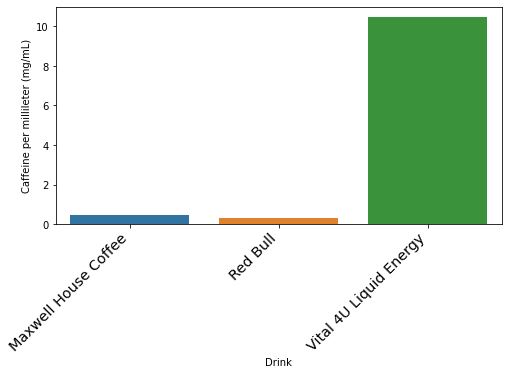

: 

In [ ]:
plt.figure(figsize=(8,4))

sns.barplot(x = [caffeine_df.iloc[140]['drink'], caffeine_df.iloc[188]['drink'], caffeine_df.iloc[406]['drink']], 
y = [caffeine_df.iloc[140]['caffeine_per_ml'], caffeine_df.iloc[188]['caffeine_per_ml'], caffeine_df.iloc[406]['caffeine_per_ml']])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Drink')
plt.ylabel('Caffeine per millileter (mg/mL)')

In [ ]:
caffeine_df.iloc[406]['caffeine_per_ml'] * 250.19181

# The amount of mL in a Redbull, multiplied by the caffeine per mL of Vital 4U Liquid Energy

2622.6

: 

Text(0, 0.5, 'Caffeine per millileter (mg/mL)')

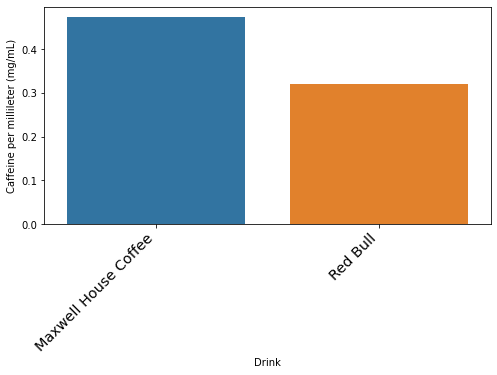

: 

In [ ]:
plt.figure(figsize=(8,4))

sns.barplot(x = [caffeine_df.iloc[140]['drink'], caffeine_df.iloc[188]['drink']], 
y = [caffeine_df.iloc[140]['caffeine_per_ml'], caffeine_df.iloc[188]['caffeine_per_ml']])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Drink')
plt.ylabel('Caffeine per millileter (mg/mL)')

In [ ]:
caffeine_df[caffeine_df['drink'].str.match('Starbucks')]

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_ml
8,Starbucks Doubleshot Espresso,192.22775,140,120,Coffee,0.624260
16,Starbucks Bottled Frappuccino,405.15695,300,110,Coffee,0.271500
29,Starbucks Bottled Iced Coffee,1419.52800,240,640,Coffee,0.450854
57,Starbucks Caramel Macchiato,473.17600,250,150,Coffee,0.317007
58,Starbucks Cold Brew Coffee,473.17600,5,205,Coffee,0.433243
59,Starbucks Decaf Coffee,473.17600,0,25,Coffee,0.052834
60,Starbucks Grande Caffe Americano,473.17600,15,225,Coffee,0.475510
61,Starbucks Grande Caffe Latte,473.17600,190,150,Coffee,0.317007
62,Starbucks Grande Caffe Mocha,473.17600,370,175,Coffee,0.369841
63,Starbucks Grande Cappuccino,473.17600,140,150,Coffee,0.317007


: 

Text(0, 0.5, 'Caffeine per millileter (mg/mL)')

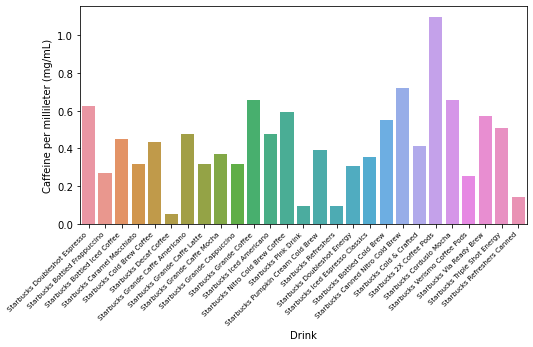

: 

In [ ]:
plt.figure(figsize=(8,4))

sns.barplot(x = caffeine_df[caffeine_df['drink'].str.match('Starbucks')]['drink'], 
y = caffeine_df[caffeine_df['drink'].str.match('Starbucks')]['caffeine_per_ml'], data=caffeine_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'  
)

plt.xlabel('Drink')
plt.ylabel('Caffeine per millileter (mg/mL)')

Text(0, 0.5, 'Caffeine per millileter (mg/mL)')

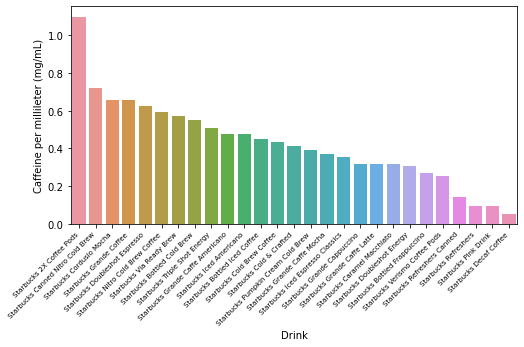

: 

In [ ]:
plt.figure(figsize=(8,4))

sns.barplot(x = caffeine_df[caffeine_df['drink'].str.match('Starbucks')].sort_values('caffeine_per_ml', ascending=False)['drink'], 
y = caffeine_df[caffeine_df['drink'].str.match('Starbucks')].sort_values('caffeine_per_ml', ascending=False)['caffeine_per_ml'], data=caffeine_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'  
)

plt.xlabel('Drink')
plt.ylabel('Caffeine per millileter (mg/mL)')

In [ ]:
caffeine_df[caffeine_df['drink'].str.match('Maxwell')].sort_values('caffeine_per_ml', ascending=False)

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_ml
141,Maxwell House Max Boost Coffee,236.588,0,196,Coffee,0.828444
140,Maxwell House Coffee,236.588,0,112,Coffee,0.473397


: 

Text(0, 0.5, 'Frequency')

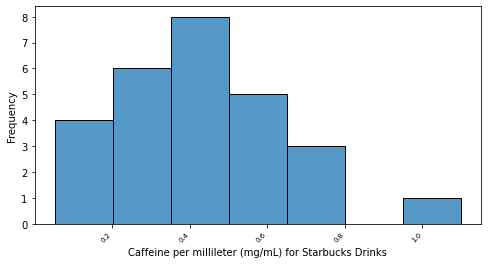

: 

In [ ]:
plt.figure(figsize=(8,4))

sns.histplot(x = caffeine_df[caffeine_df['drink'].str.match('Starbucks')].sort_values('caffeine_per_ml', ascending=False)['caffeine_per_ml'], data=caffeine_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'  
)

plt.xlabel('Caffeine per millileter (mg/mL) for Starbucks Drinks')
plt.ylabel('Frequency')

In [ ]:
caffeine_df['type'].value_counts()

Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: type, dtype: int64

: 

In [ ]:
caffeine_df.groupby('type')['caffeine_per_ml'].mean()

type
Coffee           0.668191
Energy Drinks    0.383952
Energy Shots     3.875583
Soft Drinks      0.095067
Tea              0.172558
Water            0.144068
Name: caffeine_per_ml, dtype: float64

: 

In [ ]:
caffeine_df['type'].unique()

array(['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water'], dtype=object)

: 

Text(0, 0.5, 'Caffeine per millileter (mg/mL)')

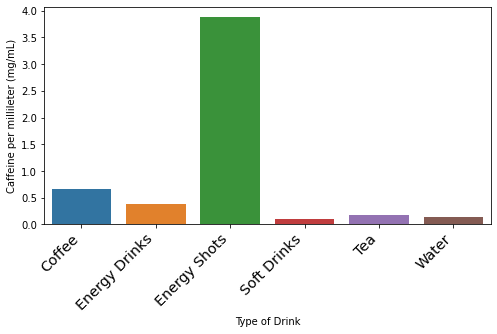

: 

In [ ]:
plt.figure(figsize=(8,4))

sns.barplot(x = caffeine_df['type'].unique(), 
y = caffeine_df.groupby('type')['caffeine_per_ml'].mean(), data=caffeine_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Type of Drink')
plt.ylabel('Caffeine per millileter (mg/mL)')

In [ ]:
caffeine_df[caffeine_df['type'] == 'Water']

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_ml
584,Perrier Energize,250.191810,35,99,Water,0.395696
585,3 Water,499.792150,0,50,Water,0.100042
586,Heroec Energy Water,499.792150,0,60,Water,0.120050
587,Caribou BOUsted Sparkling Water,340.095250,0,75,Water,0.220526
588,Phocus Sparkling Water,340.095250,0,75,Water,0.220526
589,Poland Spring Sparkling Energy Water,340.095250,35,75,Water,0.220526
590,Perrier Sparkling Water,329.744525,0,0,Water,0.000000
591,VitaminWater Energy,591.470000,100,50,Water,0.084535
592,VitaRain Zero Enhanced Water,591.470000,0,42,Water,0.071010
593,Water Joe,591.470000,0,70,Water,0.118349


: 

Text(0.5, 0, 'Caffeine per millileter (mg/mL) for Water Drinks')

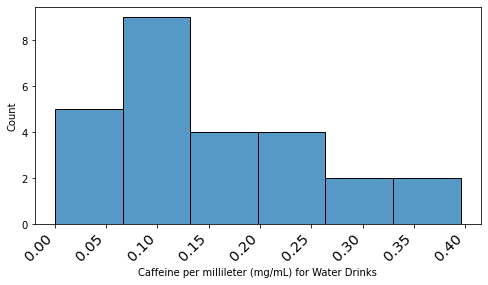

: 

In [ ]:
plt.figure(figsize=(8,4))

sns.histplot(x = caffeine_df[caffeine_df['type'] == 'Water']['caffeine_per_ml'], data=caffeine_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Caffeine per millileter (mg/mL) for Water Drinks')

Text(0, 0.5, 'Caffeine per mL (mg/mL) in Coffee Drinks')

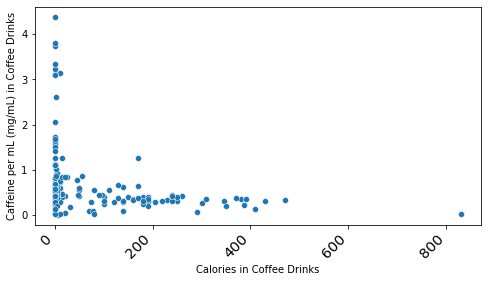

: 

In [ ]:
plt.figure(figsize=(8,4))

sns.scatterplot(x = caffeine_df[caffeine_df['type'] == 'Coffee']['Calories'], 
y = caffeine_df[caffeine_df['type'] == 'Coffee']['caffeine_per_ml'],
data=caffeine_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Calories in Coffee Drinks')
plt.ylabel('Caffeine per mL (mg/mL) in Coffee Drinks')

In [ ]:
round(caffeine_df.groupby('type').mean(), 2)

,Volume (ml),Calories,Caffeine (mg),caffeine_per_ml
type,,,,
Coffee,335.87,73.50,200.59,0.67
Energy Drinks,388.97,86.67,147.87,0.38
Energy Shots,57.74,16.50,193.42,3.88
Soft Drinks,355.24,111.11,33.68,0.10
Tea,360.47,52.76,55.86,0.17
Water,394.59,11.54,53.73,0.14


: 

In [ ]:
a = [5, 10, 15]
b = [15, 30, 60]

plt.plot(kind='scatter', a, b)

: 

: 

: 